In [1]:
from keras.datasets import mnist
from keras.layers import Conv2D,UpSampling2D,MaxPooling2D,Input
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


# adding noise to the dataset we have


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

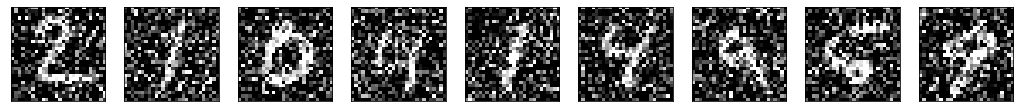

In [3]:
# plotting our dataset
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
# denoising neural network
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
______________________________

In [5]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                )



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.1752 - val_loss: 0.1281
Epoch 2/100
60000/60000 [==============================] - 7s 109us/step - loss: 0.1203 - val_loss: 0.1120
Epoch 3/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.1130 - val_loss: 0.1102
Epoch 4/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.1092 - val_loss: 0.1064
Epoch 5/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.1067 - val_loss: 0.1030
Epoch 6/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.1050 - val_loss: 0.1057
Epoch 7/100
60000/60000 [==============================] - 7s 112us/step - loss: 0.1039 - val_loss: 0.1013
Epoch 8/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.1030 - val_loss: 0.1012
Epoch 9/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1024 - val

60000/60000 [==============================] - 6s 107us/step - loss: 0.0947 - val_loss: 0.0942
Epoch 75/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0947 - val_loss: 0.0941
Epoch 76/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0946 - val_loss: 0.0945
Epoch 77/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0946 - val_loss: 0.0939
Epoch 78/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0946 - val_loss: 0.0940
Epoch 79/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0946 - val_loss: 0.0943
Epoch 80/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0945 - val_loss: 0.0940
Epoch 81/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0946 - val_loss: 0.0945
Epoch 82/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0945 - val_loss: 0.0941
Epoch 83/100
60000/60000 [===============

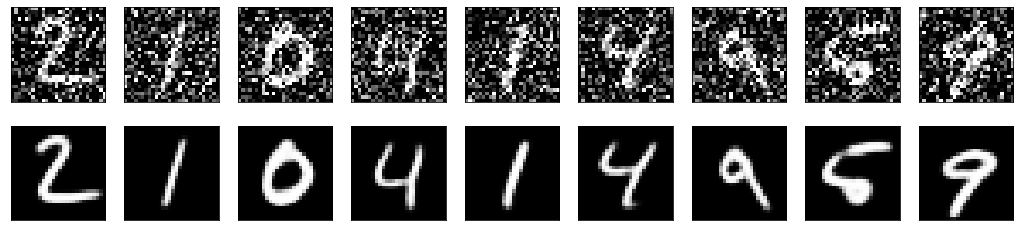

In [6]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()